Develop a classifier to predict if a passenger from Titanic survived or not. Go to Kaggle page for Titanic data and download the training and testing data sets.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

In [2]:
titanic = pd.read_csv(r'/Users/katieross/desktop/train.csv')
test = pd.read_csv(r'/Users/katieross/desktop/test.csv')
PassengerId = test['PassengerId']

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess Data

In [4]:
# Check data types and look for null values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Look for odd values
print(titanic['Survived'].unique())
print(titanic['Pclass'].unique())
print(titanic['Sex'].unique())
print(titanic['Age'].unique())
print(titanic['SibSp'].unique())
print(titanic['Parch'].unique())
print(titanic['Fare'].min())
print(titanic['Fare'].max())
print(titanic['Embarked'].unique())

[0 1]
[3 1 2]
['male' 'female']
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
0.0
512.3292
['S' 'C' 'Q' nan]


In [6]:
# Look for duplicates
duplicates = titanic.duplicated()
duplicates.value_counts()

False    891
dtype: int64

In [7]:
# Drop the unnecessary features
titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace= True)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
# Drop 2 instances with a null value in Embarked
titanic.dropna(subset=['Embarked'],inplace=True)

In [10]:
# Decide what value to fill missing ages with
print(titanic['Age'].mean())
print(titanic['Age'].median())
print(titanic['Age'].min())
print(titanic['Age'].max())
print(titanic['Age'].value_counts())

29.64209269662921
28.0
0.42
80.0
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


In [11]:
known_child = titanic[titanic['Age'] < 18]
print(known_child['Age'].mean())

9.041327433628318


In [12]:
# If SibSp > 1, it is likely a child.  Fill in age = 9
# Else, it could be a person of any age, fill in age with population average, age = 29

subset = titanic[titanic['Age'].isnull()]
child = subset[subset['SibSp']>1].index
titanic.loc[child, 'Age']=9

other = subset[subset['SibSp']<=1].index
titanic.loc[other, 'Age']=29

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 102.5+ KB


In [14]:
# Set X and y variables
X = titanic.drop(columns='Survived')
y = titanic['Survived']

In [15]:
# One-hot encode Sex and Embark
X_encode = pd.get_dummies(X, columns=['Sex', 'Embarked'])
final = pd.concat([X_encode, y], axis=1)

In [16]:
# Scale the independent features
scaler = StandardScaler()
scaled = scaler.fit_transform(X_encode)
X = pd.DataFrame(scaled)

# Support Vector Machine

In [17]:
# Determine if dataset is balanced
titanic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [18]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
# SVM hyperparameters
gamma = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10)
C = (0.01, 0.1, 0.5, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)

In [20]:
# Tuning hyperparameters
FPR, TPR = [],[]
for i in gamma:
    for j in C:
        svm = SVC(gamma=i, C=j, random_state =42)
    
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]
        FPR += [fp/(fp+tn)]
        print(f'Test Accuracy= {svm.score(X_test, y_test):.3f}, gamma = {i}, C = {j}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.635, gamma = 0.0001, C = 0.01, TPR 0.000, FPR 0.000
Test Accuracy= 0.635, gamma = 0.0001, C = 0.1, TPR 0.000, FPR 0.000
Test Accuracy= 0.635, gamma = 0.0001, C = 0.5, TPR 0.000, FPR 0.000
Test Accuracy= 0.635, gamma = 0.0001, C = 1, TPR 0.000, FPR 0.000
Test Accuracy= 0.809, gamma = 0.0001, C = 5, TPR 0.677, FPR 0.115
Test Accuracy= 0.820, gamma = 0.0001, C = 10, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 20, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 30, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 40, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 50, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 60, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 70, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 80, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 90, TPR 0.723, FPR 0.124
Test Accuracy= 0.820, gamma = 0.0001, C = 100, TPR 0.723, FP

Test Accuracy= 0.775, gamma = 10, C = 20, TPR 0.723, FPR 0.195
Test Accuracy= 0.770, gamma = 10, C = 30, TPR 0.723, FPR 0.204
Test Accuracy= 0.770, gamma = 10, C = 40, TPR 0.723, FPR 0.204
Test Accuracy= 0.770, gamma = 10, C = 50, TPR 0.723, FPR 0.204
Test Accuracy= 0.770, gamma = 10, C = 60, TPR 0.723, FPR 0.204
Test Accuracy= 0.770, gamma = 10, C = 70, TPR 0.723, FPR 0.204
Test Accuracy= 0.775, gamma = 10, C = 80, TPR 0.738, FPR 0.204
Test Accuracy= 0.775, gamma = 10, C = 90, TPR 0.738, FPR 0.204
Test Accuracy= 0.719, gamma = 10, C = 100, TPR 0.492, FPR 0.150


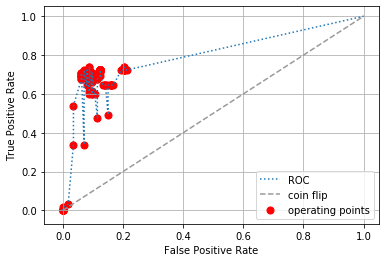

In [21]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [22]:
X = X  # from scaled dataframe
y = final['Survived'].ravel()

In [23]:
# Create SVM
svm = SVC(gamma = 0.001, C = 100, random_state =42)

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
  
# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    svm.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(svm.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.7919305413687435


# Logistic Regression

In [24]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [25]:
# Logistic Regresion hyperparameters
C = (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 50, 100)

In [26]:
# Tuning hyperparameters
FPR, TPR = [],[]
for j in C:
    logreg = LogisticRegression(C=j, random_state = 42)
    
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {logreg.score(X_test, y_test):.3f}, C = {j}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.758, C = 0.001, TPR 0.618, FPR 0.155
Test Accuracy= 0.753, C = 0.005, TPR 0.603, FPR 0.155
Test Accuracy= 0.758, C = 0.01, TPR 0.603, FPR 0.145
Test Accuracy= 0.775, C = 0.05, TPR 0.603, FPR 0.118
Test Accuracy= 0.770, C = 0.1, TPR 0.603, FPR 0.127
Test Accuracy= 0.775, C = 0.5, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 1, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 2, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 3, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 4, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 5, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 10, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 50, TPR 0.603, FPR 0.118
Test Accuracy= 0.775, C = 100, TPR 0.603, FPR 0.118


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

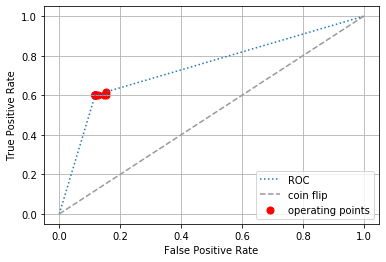

In [27]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [28]:
X = X
y = final['Survived'].ravel()

In [29]:
# Create Logistic Regression Classifier
logreg = LogisticRegression(C = 5, random_state =42)

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    logreg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(logreg.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.7941777323799796


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Random Forest

In [30]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [31]:
# Random Forest Hyperparameters
est = (100, 300, 500, 800, 1200)
depth = (5, 8, 15, 25, 30)
split = (2, 5, 10, 15, 100)
leaf = (1, 2, 5, 10)

In [32]:
# Random Forest Classifier
FPR, TPR = [],[]
for i in est:
    for j in depth:
        for k in split:
            for l in leaf:
                rfc = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, min_samples_leaf=l, random_state=42)
    
                rfc.fit(X_train, y_train)
                y_pred = rfc.predict(X_test)
                tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
                TPR += [tp/(tp+fn)]
                FPR += [fp/(fp+tn)]
                print(f'Test Accuracy= {rfc.score(X_test, y_test):.3f}, estimators = {i}, depth = {j}, split = {k}, leaf = {l}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.860, estimators = 100, depth = 5, split = 2, leaf = 1, TPR 0.787, FPR 0.103
Test Accuracy= 0.860, estimators = 100, depth = 5, split = 2, leaf = 2, TPR 0.787, FPR 0.103
Test Accuracy= 0.848, estimators = 100, depth = 5, split = 2, leaf = 5, TPR 0.770, FPR 0.111
Test Accuracy= 0.837, estimators = 100, depth = 5, split = 2, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.854, estimators = 100, depth = 5, split = 5, leaf = 1, TPR 0.787, FPR 0.111
Test Accuracy= 0.854, estimators = 100, depth = 5, split = 5, leaf = 2, TPR 0.787, FPR 0.111
Test Accuracy= 0.848, estimators = 100, depth = 5, split = 5, leaf = 5, TPR 0.770, FPR 0.111
Test Accuracy= 0.837, estimators = 100, depth = 5, split = 5, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.848, estimators = 100, depth = 5, split = 10, leaf = 1, TPR 0.787, FPR 0.120
Test Accuracy= 0.854, estimators = 100, depth = 5, split = 10, leaf = 2, TPR 0.787, FPR 0.111
Test Accuracy= 0.848, estimators = 100, depth = 5, split = 10, lea

Test Accuracy= 0.854, estimators = 100, depth = 30, split = 5, leaf = 10, TPR 0.770, FPR 0.103
Test Accuracy= 0.848, estimators = 100, depth = 30, split = 10, leaf = 1, TPR 0.820, FPR 0.137
Test Accuracy= 0.848, estimators = 100, depth = 30, split = 10, leaf = 2, TPR 0.820, FPR 0.137
Test Accuracy= 0.865, estimators = 100, depth = 30, split = 10, leaf = 5, TPR 0.820, FPR 0.111
Test Accuracy= 0.854, estimators = 100, depth = 30, split = 10, leaf = 10, TPR 0.770, FPR 0.103
Test Accuracy= 0.837, estimators = 100, depth = 30, split = 15, leaf = 1, TPR 0.803, FPR 0.145
Test Accuracy= 0.843, estimators = 100, depth = 30, split = 15, leaf = 2, TPR 0.803, FPR 0.137
Test Accuracy= 0.831, estimators = 100, depth = 30, split = 15, leaf = 5, TPR 0.770, FPR 0.137
Test Accuracy= 0.854, estimators = 100, depth = 30, split = 15, leaf = 10, TPR 0.770, FPR 0.103
Test Accuracy= 0.820, estimators = 100, depth = 30, split = 100, leaf = 1, TPR 0.787, FPR 0.162
Test Accuracy= 0.826, estimators = 100, depth =

Test Accuracy= 0.843, estimators = 300, depth = 25, split = 15, leaf = 5, TPR 0.787, FPR 0.128
Test Accuracy= 0.848, estimators = 300, depth = 25, split = 15, leaf = 10, TPR 0.754, FPR 0.103
Test Accuracy= 0.831, estimators = 300, depth = 25, split = 100, leaf = 1, TPR 0.787, FPR 0.145
Test Accuracy= 0.831, estimators = 300, depth = 25, split = 100, leaf = 2, TPR 0.787, FPR 0.145
Test Accuracy= 0.831, estimators = 300, depth = 25, split = 100, leaf = 5, TPR 0.787, FPR 0.145
Test Accuracy= 0.820, estimators = 300, depth = 25, split = 100, leaf = 10, TPR 0.787, FPR 0.162
Test Accuracy= 0.860, estimators = 300, depth = 30, split = 2, leaf = 1, TPR 0.852, FPR 0.137
Test Accuracy= 0.848, estimators = 300, depth = 30, split = 2, leaf = 2, TPR 0.820, FPR 0.137
Test Accuracy= 0.848, estimators = 300, depth = 30, split = 2, leaf = 5, TPR 0.787, FPR 0.120
Test Accuracy= 0.848, estimators = 300, depth = 30, split = 2, leaf = 10, TPR 0.754, FPR 0.103
Test Accuracy= 0.848, estimators = 300, depth =

Test Accuracy= 0.848, estimators = 500, depth = 25, split = 2, leaf = 2, TPR 0.820, FPR 0.137
Test Accuracy= 0.837, estimators = 500, depth = 25, split = 2, leaf = 5, TPR 0.787, FPR 0.137
Test Accuracy= 0.837, estimators = 500, depth = 25, split = 2, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.848, estimators = 500, depth = 25, split = 5, leaf = 1, TPR 0.836, FPR 0.145
Test Accuracy= 0.843, estimators = 500, depth = 25, split = 5, leaf = 2, TPR 0.820, FPR 0.145
Test Accuracy= 0.837, estimators = 500, depth = 25, split = 5, leaf = 5, TPR 0.787, FPR 0.137
Test Accuracy= 0.837, estimators = 500, depth = 25, split = 5, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.854, estimators = 500, depth = 25, split = 10, leaf = 1, TPR 0.836, FPR 0.137
Test Accuracy= 0.848, estimators = 500, depth = 25, split = 10, leaf = 2, TPR 0.820, FPR 0.137
Test Accuracy= 0.837, estimators = 500, depth = 25, split = 10, leaf = 5, TPR 0.787, FPR 0.137
Test Accuracy= 0.837, estimators = 500, depth = 25, spl

Test Accuracy= 0.854, estimators = 800, depth = 15, split = 10, leaf = 1, TPR 0.836, FPR 0.137
Test Accuracy= 0.848, estimators = 800, depth = 15, split = 10, leaf = 2, TPR 0.820, FPR 0.137
Test Accuracy= 0.837, estimators = 800, depth = 15, split = 10, leaf = 5, TPR 0.787, FPR 0.137
Test Accuracy= 0.837, estimators = 800, depth = 15, split = 10, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.837, estimators = 800, depth = 15, split = 15, leaf = 1, TPR 0.803, FPR 0.145
Test Accuracy= 0.837, estimators = 800, depth = 15, split = 15, leaf = 2, TPR 0.803, FPR 0.145
Test Accuracy= 0.837, estimators = 800, depth = 15, split = 15, leaf = 5, TPR 0.787, FPR 0.137
Test Accuracy= 0.837, estimators = 800, depth = 15, split = 15, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.831, estimators = 800, depth = 15, split = 100, leaf = 1, TPR 0.787, FPR 0.145
Test Accuracy= 0.831, estimators = 800, depth = 15, split = 100, leaf = 2, TPR 0.787, FPR 0.145
Test Accuracy= 0.831, estimators = 800, depth 

Test Accuracy= 0.848, estimators = 1200, depth = 8, split = 15, leaf = 10, TPR 0.754, FPR 0.103
Test Accuracy= 0.831, estimators = 1200, depth = 8, split = 100, leaf = 1, TPR 0.787, FPR 0.145
Test Accuracy= 0.831, estimators = 1200, depth = 8, split = 100, leaf = 2, TPR 0.787, FPR 0.145
Test Accuracy= 0.831, estimators = 1200, depth = 8, split = 100, leaf = 5, TPR 0.787, FPR 0.145
Test Accuracy= 0.826, estimators = 1200, depth = 8, split = 100, leaf = 10, TPR 0.787, FPR 0.154
Test Accuracy= 0.860, estimators = 1200, depth = 15, split = 2, leaf = 1, TPR 0.852, FPR 0.137
Test Accuracy= 0.848, estimators = 1200, depth = 15, split = 2, leaf = 2, TPR 0.820, FPR 0.137
Test Accuracy= 0.837, estimators = 1200, depth = 15, split = 2, leaf = 5, TPR 0.787, FPR 0.137
Test Accuracy= 0.837, estimators = 1200, depth = 15, split = 2, leaf = 10, TPR 0.754, FPR 0.120
Test Accuracy= 0.843, estimators = 1200, depth = 15, split = 5, leaf = 1, TPR 0.820, FPR 0.145
Test Accuracy= 0.848, estimators = 1200, de

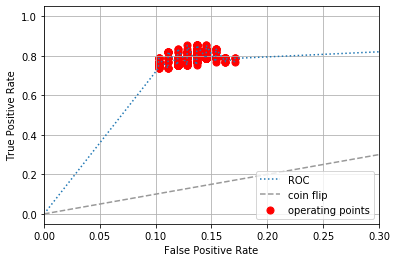

In [33]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 0.3])
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [34]:
X = X
y = final['Survived'].ravel()

In [35]:
# Create Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=15, min_samples_leaf=1, random_state =42)

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.8368998978549541


# Neural Network Classifier

In [36]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [37]:
# Neural Network Hyperparameters
alpha = (0.00001,0.0001,0.001,0.01,0.1,1)
learning = (0.00001,0.0001,0.001,0.01,0.1,1)

In [38]:
# Neural Network Classifier
FPR3, TPR3 = [],[]
for i in alpha:
    for j in learning:
        nn = MLPClassifier(alpha=i, learning_rate_init=j, max_iter=2000,random_state=42)
    
        nn.fit(X_train, y_train)
        y_pred = nn.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR3 += [tp/(tp+fn)]
        FPR3 += [fp/(fp+tn)]
        print(f'Test Accuracy= {nn.score(X_test, y_test):.3f}, alpha = {i}, learning = {j}, TPR {TPR3[-1]:.3f}, FPR {FPR3[-1]:.3f}')

Test Accuracy= 0.736, alpha = 1e-05, learning = 1e-05, TPR 0.671, FPR 0.219
Test Accuracy= 0.775, alpha = 1e-05, learning = 0.0001, TPR 0.658, FPR 0.143
Test Accuracy= 0.770, alpha = 1e-05, learning = 0.001, TPR 0.603, FPR 0.114
Test Accuracy= 0.764, alpha = 1e-05, learning = 0.01, TPR 0.603, FPR 0.124
Test Accuracy= 0.730, alpha = 1e-05, learning = 0.1, TPR 0.534, FPR 0.133
Test Accuracy= 0.742, alpha = 1e-05, learning = 1, TPR 0.644, FPR 0.190
Test Accuracy= 0.736, alpha = 0.0001, learning = 1e-05, TPR 0.671, FPR 0.219
Test Accuracy= 0.775, alpha = 0.0001, learning = 0.0001, TPR 0.658, FPR 0.143
Test Accuracy= 0.770, alpha = 0.0001, learning = 0.001, TPR 0.603, FPR 0.114
Test Accuracy= 0.764, alpha = 0.0001, learning = 0.01, TPR 0.603, FPR 0.124
Test Accuracy= 0.775, alpha = 0.0001, learning = 0.1, TPR 0.616, FPR 0.114
Test Accuracy= 0.736, alpha = 0.0001, learning = 1, TPR 0.548, FPR 0.133
Test Accuracy= 0.736, alpha = 0.001, learning = 1e-05, TPR 0.671, FPR 0.219
Test Accuracy= 0.7

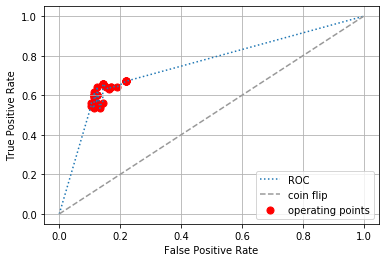

In [39]:
# Sorts the points to display nicely on ROC
FPR3, TPR3 = zip(*sorted(zip(FPR3, TPR3)))
fpr = [0.]+list(FPR3)+[1.]; tpr = [0.]+list(TPR3)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR3, TPR3, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [40]:
X = X
y = final['Survived'].ravel()

In [41]:
# Create Neural Network Classifier
NN = MLPClassifier(alpha=0.0001, learning_rate_init=0.01, max_iter=2000,random_state=42)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
  
# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    NN.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(NN.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.8008810010214505


# Make prediction on test data using Random Forest Classifier

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocess test data

In [43]:
# Look for odd values
print(test['Pclass'].unique())
print(test['Sex'].unique())
print(test['Age'].unique())
print(test['SibSp'].unique())
print(test['Parch'].unique())
print(test['Fare'].min())
print(test['Fare'].max())
print(test['Embarked'].unique())

[3 2 1]
['male' 'female']
[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ]
[0 1 2 3 4 5 8]
[0 1 3 2 4 6 5 9]
0.0
512.3292
['Q' 'S' 'C']


In [44]:
# Check data types and look for null values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
# Drop the unnecessary features
test.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace= True)

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


## Replace NaN

In [47]:
# Find row with null value in Fare
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [48]:
# Calculate average fare in 3rd class
third = titanic[titanic['Pclass'] == 3]
third['Fare'].mean()

13.675550101832997

In [49]:
# Replace NaN with average fare
test.iloc[[152],[5]] = 13.7

In [50]:
# Replace NaN for Age feature
# If SibSp > 1, it is likely a child.  Fill in age = 9
# Else, it could be a person of any age, fill in age with population average, age = 29

subset = test[test['Age'].isnull()]
child = subset[subset['SibSp']>1].index
test.loc[child, 'Age']=9

other = subset[subset['SibSp']<=1].index
test.loc[other, 'Age']=29

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [52]:
# One-hot encode Sex and Embark
encode = pd.get_dummies(test, columns=['Sex', 'Embarked'])

In [53]:
# Scale the independent features
scaler = StandardScaler()
scaled = scaler.fit_transform(encode)
X = pd.DataFrame(scaled)

In [54]:
# Predict survival of test data
predict = RFC.predict(X)

In [55]:
# Save predictions to DataFrame
prediction = pd.DataFrame(PassengerId, columns=['PassengerId'])
prediction['Survived']=predict

In [56]:
# Write csv to file
prediction.to_csv(r'/Users/katieross/desktop/RFC_predict_survival_KRoss.csv', index=False)